In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns       

from scipy import stats
from scipy.stats import  norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  

## Read data

In [2]:
house_price = pd.read_csv("database.csv")
house_price.head()

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,review_score,basement_size,built,renovation,zipcode,latitude,longitude,living_room_size,lot_size
0,7787980.0,13 October 2014,221900.0,3.0,1.00,1.0,0.0,0.0,fair,10.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6774848.0,09 December 2014,538000.0,3.0,2.25,2.0,0.0,0.0,fair,7.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,6999329.0,25 February 2015,180000.0,2.0,1.00,1.0,0.0,0.0,fair,8.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,7773052.0,09 December 2014,604000.0,4.0,3.00,1.0,0.0,0.0,excellent,6.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,7760818.0,18 February 2015,510000.0,3.0,2.00,1.0,0.0,0.0,fair,6.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [3]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23154 entries, 0 to 23153
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                21871 non-null  float64
 1   date              21925 non-null  object 
 2   price             21896 non-null  float64
 3   bedrooms          21905 non-null  float64
 4   bathrooms         21938 non-null  float64
 5   floors            21862 non-null  float64
 6   waterfront        21871 non-null  float64
 7   view              21908 non-null  float64
 8   condition         21890 non-null  object 
 9   review_score      21851 non-null  float64
 10  basement_size     21929 non-null  float64
 11  built             21853 non-null  float64
 12  renovation        21897 non-null  float64
 13  zipcode           21884 non-null  float64
 14  latitude          21903 non-null  float64
 15  longitude         21883 non-null  float64
 16  living_room_size  21912 non-null  float6

In [4]:
house_price.isnull().sum()

id                  1283
date                1229
price               1258
bedrooms            1249
bathrooms           1216
floors              1292
waterfront          1283
view                1246
condition           1264
review_score        1303
basement_size       1225
built               1301
renovation          1257
zipcode             1270
latitude            1251
longitude           1271
living_room_size    1242
lot_size            1222
dtype: int64

In [5]:
# if there is no id recorded, we have reasons to believe that those data is not reliable. So we remove those records
# with no ids firstly
house_price= house_price.dropna(how='any', subset=['id'])
house_price['id'].isnull().sum()

0

In [6]:
house_price.loc[house_price.duplicated(keep=False)]

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,review_score,basement_size,built,renovation,zipcode,latitude,longitude,living_room_size,lot_size
22,7073168.0,03 July 2014,285000.0,5.0,2.50,2.0,0.0,0.0,fair,7.0,0.0,1995.0,0.0,98092.0,47.3266,-122.169,2240.0,7005.0
91,7042662.0,11 March 2015,1099880.0,5.0,2.75,2.0,0.0,0.0,good,7.0,0.0,2001.0,0.0,98199.0,47.6506,-122.391,2520.0,6250.0
242,7683955.0,27 January 2015,455000.0,2.0,1.00,1.5,0.0,0.0,poor,8.0,0.0,1925.0,0.0,98115.0,47.6727,-122.299,1450.0,3750.0
281,7804326.0,27 February 2015,170000.0,2.0,1.00,1.0,0.0,0.0,fair,8.0,0.0,1931.0,0.0,98178.0,47.5048,-122.272,1650.0,8775.0
380,8011639.0,16 September 2014,270000.0,2.0,1.50,1.0,0.0,0.0,terrible,7.0,0.0,1954.0,0.0,98011.0,47.7461,-122.195,3130.0,19868.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23122,7706458.0,02 March 2015,1300000.0,5.0,2.50,2.0,0.0,0.0,good,7.0,0.0,1991.0,0.0,98006.0,47.5455,-122.126,4670.0,37960.0
23123,7474820.0,04 November 2014,239000.0,4.0,2.00,1.5,0.0,0.0,poor,7.0,0.0,1924.0,0.0,98055.0,47.4836,-122.214,1360.0,7810.0
23126,7797039.0,01 December 2014,385000.0,4.0,2.50,1.0,0.0,0.0,fair,7.0,800.0,1963.0,0.0,98052.0,47.6560,-122.134,2050.0,9068.0
23147,6749004.0,10 April 2015,237000.0,3.0,1.50,1.0,0.0,0.0,fair,7.0,0.0,1962.0,0.0,98198.0,47.3798,-122.306,1640.0,8060.0


In [7]:
house_price = house_price.drop_duplicates()

## Check target variable 

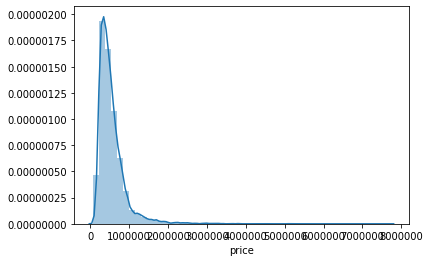

In [8]:
sns.distplot(house_price['price'])

# Feature Selection

In [9]:
# save id for later
#house_id = house_price['id']
# remove id
# date is definitely not realted to price, so remove
# waterfront too many 0.0
# view too many 0.0 
# latitude and longitutide variables are kind of duplicated with zipcode
house_price = house_price.drop(['id','date','waterfront','view','renovation','latitude','longitude'],axis=1)
house_price

,price,bedrooms,bathrooms,floors,condition,review_score,basement_size,built,zipcode,living_room_size,lot_size
0,221900.0,3.0,1.00,1.0,fair,10.0,0.0,1955.0,98178.0,1340.0,5650.0
1,538000.0,3.0,2.25,2.0,fair,7.0,400.0,1951.0,98125.0,1690.0,7639.0
2,180000.0,2.0,1.00,1.0,fair,8.0,0.0,1933.0,98028.0,2720.0,8062.0
3,604000.0,4.0,3.00,1.0,excellent,6.0,910.0,1965.0,98136.0,1360.0,5000.0
4,510000.0,3.0,2.00,1.0,fair,6.0,0.0,1987.0,98074.0,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...
23146,750000.0,3.0,2.50,2.0,good,9.0,0.0,1990.0,98070.0,2350.0,41433.0
23148,660000.0,5.0,2.25,1.5,good,NaN,1030.0,1925.0,98115.0,1780.0,3750.0
23150,239000.0,3.0,1.50,1.0,fair,NaN,430.0,1971.0,98188.0,1400.0,11500.0
23151,179000.0,2.0,1.00,1.0,FAIR,11.0,0.0,1949.0,98188.0,1100.0,8916.0


In [10]:
print(house_price['condition'].value_counts())

fair         12578
good          5071
excellent     1498
FAIR          1072
GOOD           474
EXCELLENT      156
poor           147
terrible        29
POOR            14
TERRIBLE         2
Name: condition, dtype: int64


In [11]:
house_price = pd.get_dummies(house_price, columns=['condition'])

In [57]:
house_price

,price,bedrooms,bathrooms,floors,review_score,basement_size,built,zipcode,living_room_size,lot_size,condition_EXCELLENT,condition_FAIR,condition_GOOD,condition_POOR,condition_TERRIBLE,condition_excellent,condition_fair,condition_good,condition_poor,condition_terrible
0,221900.0,3.0,1.00,1.0,10.0,0.0,1955.0,98178.0,1340.0,5650.0,0,0,0,0,0,0,1,0,0,0
1,538000.0,3.0,2.25,2.0,7.0,400.0,1951.0,98125.0,1690.0,7639.0,0,0,0,0,0,0,1,0,0,0
2,180000.0,2.0,1.00,1.0,8.0,0.0,1933.0,98028.0,2720.0,8062.0,0,0,0,0,0,0,1,0,0,0
3,604000.0,4.0,3.00,1.0,6.0,910.0,1965.0,98136.0,1360.0,5000.0,0,0,0,0,0,1,0,0,0,0
4,510000.0,3.0,2.00,1.0,6.0,0.0,1987.0,98074.0,1800.0,7503.0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23146,750000.0,3.0,2.50,2.0,9.0,0.0,1990.0,98070.0,2350.0,41433.0,0,0,0,0,0,0,0,1,0,0
23148,660000.0,5.0,2.25,1.5,NaN,1030.0,1925.0,98115.0,1780.0,3750.0,0,0,0,0,0,0,0,1,0,0
23150,239000.0,3.0,1.50,1.0,NaN,430.0,1971.0,98188.0,1400.0,11500.0,0,0,0,0,0,0,1,0,0,0
23151,179000.0,2.0,1.00,1.0,11.0,0.0,1949.0,98188.0,1100.0,8916.0,0,1,0,0,0,0,0,0,0,0


# Fill Missing Values

In [58]:
# since there is missing values in target variable
# fill missing values with mean price
for col in house_price.columns:
    house_price[col].fillna(house_price[col].mean(), inplace=True)
#house_price['id'] = house_id
house_price.isnull().sum()

price                  0
bedrooms               0
bathrooms              0
floors                 0
review_score           0
basement_size          0
built                  0
zipcode                0
living_room_size       0
lot_size               0
condition_EXCELLENT    0
condition_FAIR         0
condition_GOOD         0
condition_POOR         0
condition_TERRIBLE     0
condition_excellent    0
condition_fair         0
condition_good         0
condition_poor         0
condition_terrible     0
dtype: int64

In [59]:
house_price

,price,bedrooms,bathrooms,floors,review_score,basement_size,built,zipcode,living_room_size,lot_size,condition_EXCELLENT,condition_FAIR,condition_GOOD,condition_POOR,condition_TERRIBLE,condition_excellent,condition_fair,condition_good,condition_poor,condition_terrible
0,221900.0,3.0,1.00,1.0,10.000000,0.0,1955.0,98178.0,1340.0,5650.0,0,0,0,0,0,0,1,0,0,0
1,538000.0,3.0,2.25,2.0,7.000000,400.0,1951.0,98125.0,1690.0,7639.0,0,0,0,0,0,0,1,0,0,0
2,180000.0,2.0,1.00,1.0,8.000000,0.0,1933.0,98028.0,2720.0,8062.0,0,0,0,0,0,0,1,0,0,0
3,604000.0,4.0,3.00,1.0,6.000000,910.0,1965.0,98136.0,1360.0,5000.0,0,0,0,0,0,1,0,0,0,0
4,510000.0,3.0,2.00,1.0,6.000000,0.0,1987.0,98074.0,1800.0,7503.0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23146,750000.0,3.0,2.50,2.0,9.000000,0.0,1990.0,98070.0,2350.0,41433.0,0,0,0,0,0,0,0,1,0,0
23148,660000.0,5.0,2.25,1.5,7.657964,1030.0,1925.0,98115.0,1780.0,3750.0,0,0,0,0,0,0,0,1,0,0
23150,239000.0,3.0,1.50,1.0,7.657964,430.0,1971.0,98188.0,1400.0,11500.0,0,0,0,0,0,0,1,0,0,0
23151,179000.0,2.0,1.00,1.0,11.000000,0.0,1949.0,98188.0,1100.0,8916.0,0,1,0,0,0,0,0,0,0,0


# Predict

In [60]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

X = house_price.loc[:,house_price.columns != 'price']
Y = house_price['price'].values
X_train,X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
clf = RandomForestRegressor(n_estimators=400)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[447673.         901278.13419833 333894.46       ... 521202.90062301
 486381.5575     197643.39      ]


In [61]:
sum(abs(y_pred - y_test))/len(y_pred)

104658.40616218427

In [62]:
feature_imp = pd.Series(clf.feature_importances_,index=list(X)).sort_values(ascending=False)
feature_imp # rank the important features 

living_room_size       0.370351
bathrooms              0.206485
zipcode                0.125007
lot_size               0.088550
built                  0.086281
basement_size          0.049279
bedrooms               0.019134
review_score           0.018241
floors                 0.018035
condition_fair         0.005300
condition_good         0.004931
condition_excellent    0.003814
condition_FAIR         0.002263
condition_GOOD         0.001158
condition_poor         0.000424
condition_EXCELLENT    0.000366
condition_terrible     0.000362
condition_POOR         0.000020
condition_TERRIBLE     0.000000
dtype: float64

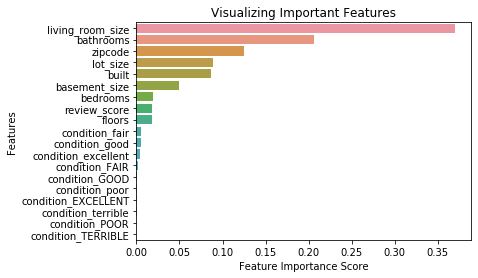

In [63]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

In [67]:
# now we choose more important variables
cols = ['living_room_size', 'bathrooms', 'zipcode','lot_size','built']
X_train = X_train[cols]
X_test = X_test[cols]

In [68]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[429792.95833333 806960.71339665 346342.105      ... 518682.56854477
 480559.21708333 201094.8325    ]


In [69]:
sum(abs(y_pred - y_test))/len(y_pred)

104296.96621904439